In [118]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [119]:
train_dir = 'path_to_train_images'
val_dir = 'path_to_validation_images'

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (300, 300)
batch_size = 32

train_dir = "potato/Training"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=image_size,
                                                    batch_size=batch_size, 
                                                    class_mode='categorical')

test_dir = "potato/Testing"
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=image_size,
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 3251 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def get_model():
    model = Sequential()

    # 1st layer CNN
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 2nd layer CNN
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5,5)))

    # 3rd layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=2))

    # 4th layer CNN
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))

    # Add flatten layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    
    model.add(Dense(3, activation='softmax'))  

    return model

In [23]:
model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 512)         1180160   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 512)       

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [27]:

history = model.fit(train_generator, epochs=10, validation_data = test_generator)

Epoch 1/10
102/102 [==============================] - 489s 5s/step - loss: 0.9495 - accuracy: 0.5451 - val_loss: 0.7383 - val_accuracy: 0.7086
Epoch 2/10
102/102 [==============================] - 641s 6s/step - loss: 0.7697 - accuracy: 0.6718 - val_loss: 0.6115 - val_accuracy: 0.7951
Epoch 3/10
102/102 [==============================] - 520s 5s/step - loss: 0.4275 - accuracy: 0.8364 - val_loss: 0.5432 - val_accuracy: 0.8173
Epoch 4/10
102/102 [==============================] - 1000s 10s/step - loss: 0.2954 - accuracy: 0.8871 - val_loss: 0.2293 - val_accuracy: 0.9235
Epoch 5/10
102/102 [==============================] - 516s 5s/step - loss: 0.1907 - accuracy: 0.9326 - val_loss: 0.2546 - val_accuracy: 0.9037
Epoch 6/10
102/102 [==============================] - 443s 4s/step - loss: 0.1766 - accuracy: 0.9360 - val_loss: 0.1802 - val_accuracy: 0.9383
Epoch 7/10
102/102 [==============================] - 552s 5s/step - loss: 0.1378 - accuracy: 0.9523 - val_loss: 0.1998 - val_accuracy: 0.95

In [127]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [106]:
# Define Model_2 - Neural Network with Optimizations
model_2 = Sequential()

# Input Layer with L2 Regularization, matching image size (300x300) and 3 color channels
model_2.add(Flatten(input_shape=(300, 300, 3)))  # Flattening the 300x300 image into 1D
model_2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Regularized Dense Layer
model_2.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Hidden Layer with L2 Regularization
model_2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Output Layer
output_classes = train_generator.num_classes  # Dynamically setting the number of classes
model_2.add(Dense(output_classes, activation='softmax'))


In [108]:
# Compile Model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
# Train the Model
history_2 = model_2.fit(train_generator, validation_data=test_generator, epochs=10)


Epoch 1/10
102/102 [==============================] - 165s 2s/step - loss: 16.0999 - accuracy: 0.3676 - val_loss: 4.2529 - val_accuracy: 0.4025
Epoch 2/10
102/102 [==============================] - 57s 559ms/step - loss: 3.4198 - accuracy: 0.3931 - val_loss: 3.1021 - val_accuracy: 0.2519
Epoch 3/10
102/102 [==============================] - 51s 501ms/step - loss: 2.3185 - accuracy: 0.3996 - val_loss: 1.8354 - val_accuracy: 0.4000
Epoch 4/10
102/102 [==============================] - 52s 510ms/step - loss: 1.7251 - accuracy: 0.4051 - val_loss: 1.5481 - val_accuracy: 0.4000
Epoch 5/10
102/102 [==============================] - 52s 510ms/step - loss: 1.5689 - accuracy: 0.3996 - val_loss: 1.4900 - val_accuracy: 0.4000
Epoch 6/10
102/102 [==============================] - 52s 504ms/step - loss: 1.5105 - accuracy: 0.4011 - val_loss: 1.4931 - val_accuracy: 0.4000
Epoch 7/10
102/102 [==============================] - 54s 531ms/step - loss: 1.6001 - accuracy: 0.3959 - val_loss: 1.5017 - val_acc

In [110]:
# Evaluate the Model
test_loss_opt, test_acc_opt = model_2.evaluate(test_generator)
print(f"Test Accuracy for Model_2: {test_acc_opt}")

13/13 [==============================] - 3s 263ms/step - loss: 1.3943 - accuracy: 0.4000
Test Accuracy for Model_2: 0.4000000059604645


102/102 [==============================] - 124s 1s/step


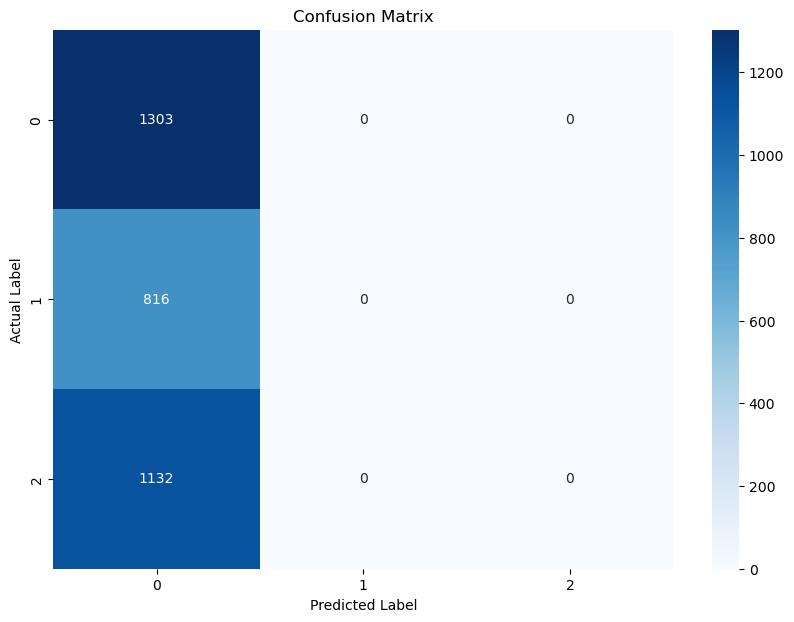

              precision    recall  f1-score   support

           0       0.40      1.00      0.57      1303
           1       0.00      0.00      0.00       816
           2       0.00      0.00      0.00      1132

    accuracy                           0.40      3251
   macro avg       0.13      0.33      0.19      3251
weighted avg       0.16      0.40      0.23      3251



c:\Users\St Prince N\anaconda3\envs\Crop-Disease-Detection\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\St Prince N\anaconda3\envs\Crop-Disease-Detection\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\St Prince N\anaconda3\envs\Crop-Disease-Detection\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [128]:
# Assuming you have val_generator for validation data
y_pred = model_2.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = train_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes))


Epoch 1/10
102/102 [==============================] - 79s 716ms/step - loss: 1.5781 - accuracy: 0.3888 - val_loss: 1.4404 - val_accuracy: 0.4008
Epoch 2/10
102/102 [==============================] - 70s 687ms/step - loss: 1.4437 - accuracy: 0.3867 - val_loss: 1.6047 - val_accuracy: 0.3374
Epoch 3/10
102/102 [==============================] - 70s 687ms/step - loss: 1.4152 - accuracy: 0.4008 - val_loss: 1.3912 - val_accuracy: 0.3679
Epoch 4/10
102/102 [==============================] - 72s 710ms/step - loss: 1.4800 - accuracy: 0.3885 - val_loss: 2.0192 - val_accuracy: 0.4008
Epoch 5/10
102/102 [==============================] - 70s 686ms/step - loss: 1.5680 - accuracy: 0.3888 - val_loss: 1.3738 - val_accuracy: 0.4008
Epoch 6/10
102/102 [==============================] - 69s 680ms/step - loss: 1.3695 - accuracy: 0.3925 - val_loss: 1.3636 - val_accuracy: 0.4005
Epoch 7/10
102/102 [==============================] - 69s 675ms/step - loss: 1.3781 - accuracy: 0.4005 - val_loss: 1.4361 - val_ac

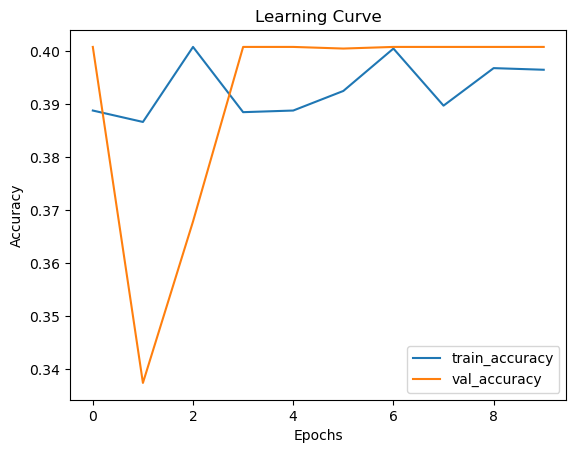

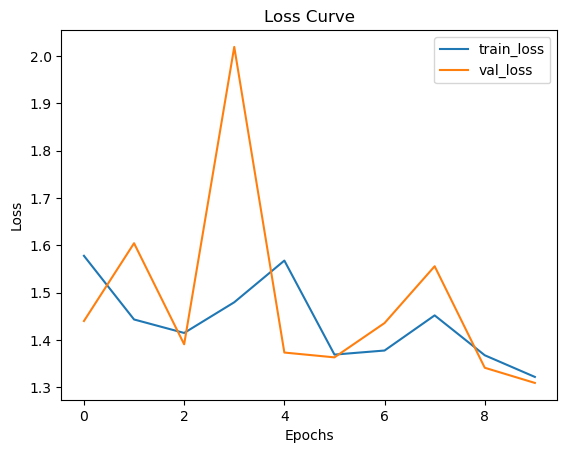

In [131]:
# Fit the model and save the history
history = model_2.fit(train_generator, epochs=10, validation_data=train_generator)

# Plotting accuracy and loss after fitting the model
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()
